# Context



In the 1950s, before the widespread use of digital computers, mathematicians and scientists relied heavily on comprehensive handbooks of mathematical functions, like the famous *Handbook of Mathematical Functions* by Milton Abramowitz and Irene Stegun, first published in 1964. This handbook provided detailed tables for numerous functions—such as trigonometric, logarithmic, and special functions (including Bessel functions)—which were essential for engineers, physicists, and mathematicians.

https://en.wikipedia.org/wiki/Abramowitz_and_Stegun


### Observation on the Role of Function Tables in Abramowitz's Handbook:

At the time, the tables in Abramowitz’s handbook served a critical purpose: they were a reliable reference for scientists who needed to compute values of complex mathematical functions but lacked access to modern computational tools. These tables were calculated meticulously and provided a level of precision necessary for practical applications in science and engineering.

The Bessel functions, including \( J_0(x) \), frequently appeared in problems involving wave propagation, electromagnetism, and quantum mechanics. In the handbook, values of these functions were tabulated for various \( x \)-values so that researchers could look up answers quickly without needing to perform laborious hand calculations.

# Exercise

You are a computer scientist in the late 1950's and receive this request:


##  Memo to the Computing Department, 1956

**To**: Computing Department  
**From**: Dr. Celestina Hale, Department of Astronomy  
**Date**: May 17, 1956  
**Subject**: Urgent Request for Bessel Function Tables

Dear Colleagues,

As part of our ongoing research into the oscillation patterns of distant celestial bodies, I require a precise table of values for the Bessel function of the first kind, $J_0(x)$, which is essential in solving certain differential equations related to wave mechanics. Specifically, I need values computed for $J_0(x)$ at several points between $ x = 0 $ and $ x = 10 $.

Given the limitations of our resources, I would like to request that this function be approximated using its truncated series expansion up to the 15th term. The series expansion for $J_0(x)$ is as follows:


$J_0(x) = \sum_{k=0}^{14} \frac{(-1)^k}{(k!)^2} \left( \frac{x}{2} \right)^{2k}$


This approximation should suffice for our current precision needs. Once the table is generated, it will aid us in understanding the wave patterns observed in our astronomical data.

I trust the department's expertise in ensuring that these tables are calculated accurately and in a timely manner. Please ensure the values are computed for 20 evenly spaced points between $x = 0$ and $x = 10$.

Thank you for your prompt attention to this matter.

Best regards,  
**Dr. Celestina Hale**  
Lead Astronomer, Celestial Dynamics Research Group



# Lazy Approach

Using versatile python libraries we can achive that in few lines of codes

In [1]:
import numpy as np
import pandas as pd
from scipy.special import j0

# Generate 20 points between 0 and 10
x_values = np.linspace(0, 10, 20)

# Compute the Bessel function of the first kind J0 for these values
bessel_values = j0(x_values)

# Create a DataFrame to display the results
df_bessel = pd.DataFrame({
    'x': x_values,
    'Bessel Function J0(x)': bessel_values
})

print(df_bessel)

            x  Bessel Function J0(x)
0    0.000000               1.000000
1    0.526316               0.931938
2    1.052632               0.741595
3    1.578947               0.467377
4    2.105263               0.163617
5    2.631579              -0.111533
6    3.157895              -0.308829
7    3.684211              -0.398329
8    4.210526              -0.375079
9    4.736842              -0.258909
10   5.263158              -0.088539
11   5.789474               0.088421
12   6.315789               0.227065
13   6.842105               0.295573
14   7.368421               0.281926
15   7.894737               0.195513
16   8.421053               0.063449
17   8.947368              -0.077265
18   9.473684              -0.189612
19  10.000000              -0.245936


But wait, the bessel function asked by Dr. Hale is too exact (modern methods truncate the series further), she will suspect that we do not belong to 1956, let' implement the correct method (even if this is less accurate).

# Less Lazy Approach

In [2]:
import math

# Define the truncated Bessel function J0 using up to the 15th term in the series
def truncated_bessel_j0(x, terms=15):
    bessel_sum = 0
    for k in range(terms):
        bessel_sum += ((-1)**k) / (math.factorial(k)**2) * (x / 2)**(2 * k)
    return bessel_sum

# Compute the Bessel function J0 using the truncated series expansion for the same 20 points
truncated_bessel_values = [truncated_bessel_j0(x, terms=15) for x in x_values]

# Create a DataFrame to display the results
df_truncated_bessel = pd.DataFrame({
    'x': x_values,
    'Truncated Bessel Function J0(x)': truncated_bessel_values
})

# Display the table
print(df_truncated_bessel)

            x  Truncated Bessel Function J0(x)
0    0.000000                         1.000000
1    0.526316                         0.931938
2    1.052632                         0.741595
3    1.578947                         0.467377
4    2.105263                         0.163617
5    2.631579                        -0.111533
6    3.157895                        -0.308829
7    3.684211                        -0.398329
8    4.210526                        -0.375079
9    4.736842                        -0.258909
10   5.263158                        -0.088539
11   5.789474                         0.088421
12   6.315789                         0.227065
13   6.842105                         0.295573
14   7.368421                         0.281926
15   7.894737                         0.195514
16   8.421053                         0.063452
17   8.947368                        -0.077247
18   9.473684                        -0.189514
19  10.000000                        -0.245440


# Let's analyse

You may notice that there are small differences, lets plot them.

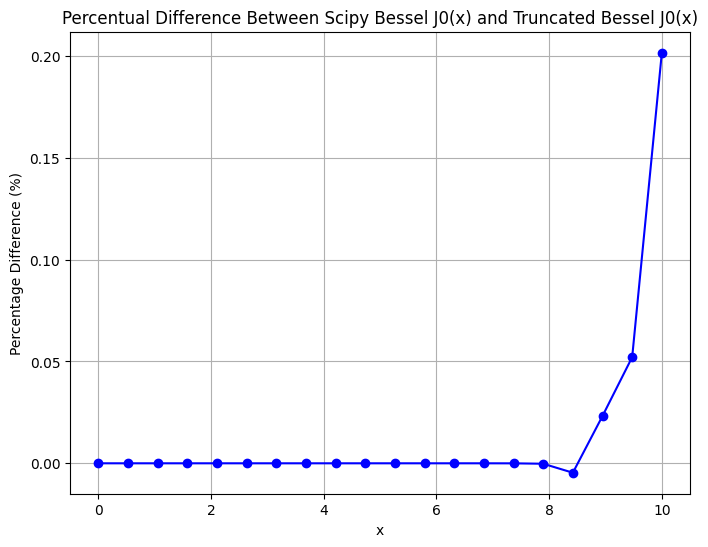

In [3]:
import matplotlib.pyplot as plt

percent_diff = 100 * (np.array(bessel_values) - np.array(truncated_bessel_values)) / np.array(bessel_values)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, percent_diff, marker='o', linestyle='-', color='b')
plt.title('Percentual Difference Between Scipy Bessel J0(x) and Truncated Bessel J0(x)')
plt.xlabel('x')
plt.ylabel('Percentage Difference (%)')
plt.grid(True)
plt.show()

# Exercise during the class : 6/09/2024

Plotting the formula:


$f(t) = \frac{4}{\pi} \sum_{n=1,3,5,\dots}^\infty \frac{1}{n} \sin\left( \frac{2\pi n x}{L} \right) $

             x  Truncated Square Wave Fourier Series
0     0.000000                              0.000000
1     0.060302                              0.941613
2     0.120603                              1.011586
3     0.180905                              1.027830
4     0.241206                              1.017826
..         ...                                   ...
195  11.758794                             -1.006483
196  11.819095                             -1.001001
197  11.879397                             -0.993854
198  11.939698                             -0.991153
199  12.000000                             -0.996086

[200 rows x 2 columns]


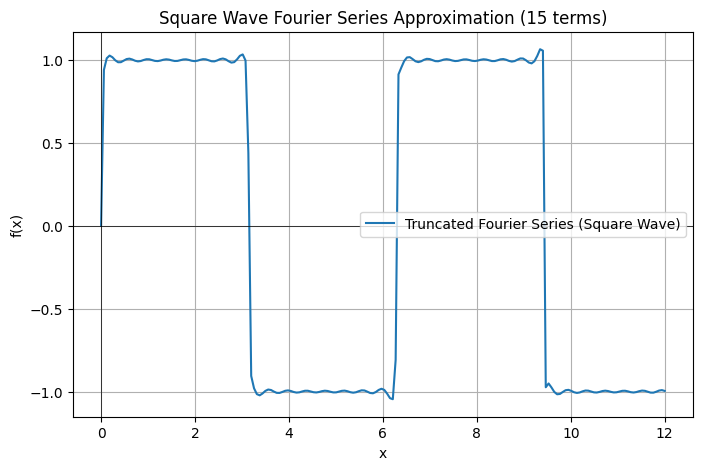

In [13]:
import numpy as np
import pandas as pd

def square_wave_fourier_series(x, terms=15, L=np.pi):
    fourier_sum = 0
    for n in range(1, 2 * terms, 2):  # odd terms only: 1, 3, 5, ...
        fourier_sum += (4 / np.pi) * (1 / n) * np.sin(n * x * np.pi / L)
    return fourier_sum

# Compute the square wave using the truncated Fourier series for the same 20 points
x_values = np.linspace(0, 12 , 200)  # x values from 0 to 12
square_wave_values = [square_wave_fourier_series(x, terms=60) for x in x_values]

# Create a DataFrame to display the results
df_square_wave = pd.DataFrame({
    'x': x_values,
    'Truncated Square Wave Fourier Series': square_wave_values
})

# Display the table
print(df_square_wave)


# Plot the truncated Fourier series for the square wave
plt.figure(figsize=(8, 5))
plt.plot(x_values, square_wave_values, label='Truncated Fourier Series (Square Wave)')
plt.title('Square Wave Fourier Series Approximation (15 terms)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()